In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/jildiz/opt/anaconda3/lib/python3.8/site-packages (0.0)
You should consider upgrading via the '/Users/jildiz/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

You should consider upgrading via the '/Users/jildiz/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [6]:
#Making you dataframe based on sorted features
sorted_df=df[['koi_disposition','koi_fpflag_co', 'koi_fpflag_nt','koi_fpflag_ss', 'koi_prad','koi_model_snr','koi_fpflag_ec', 'koi_duration_err2','koi_prad_err2','koi_steff_err2','koi_duration_err1' ]]
sorted_df

,koi_disposition,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_prad,koi_model_snr,koi_fpflag_ec,koi_duration_err2,koi_prad_err2,koi_steff_err2,koi_duration_err1
0,CONFIRMED,0,0,0,2.83,25.8,0,-0.11600,-0.19,-81,0.11600
1,FALSE POSITIVE,0,0,1,14.60,76.3,0,-0.03410,-1.31,-176,0.03410
2,FALSE POSITIVE,0,0,1,33.46,505.6,0,-0.00537,-2.83,-174,0.00537
3,CONFIRMED,0,0,0,2.75,40.9,0,-0.04200,-0.35,-211,0.04200
4,CONFIRMED,0,0,0,2.77,40.2,0,-0.06730,-0.30,-232,0.06730
...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1.11,8.4,1,-0.63400,-0.23,-152,0.63400
6987,FALSE POSITIVE,1,0,1,29.35,453.3,0,-0.01740,-2.57,-166,0.01740
6988,CANDIDATE,0,0,0,0.72,10.6,0,-0.22900,-0.08,-220,0.22900
6989,FALSE POSITIVE,1,0,0,1.07,12.3,0,-0.16200,-0.11,-236,0.16200


# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]


In [8]:
#Setting new features based on sorted features
X1 = df[['koi_fpflag_co', 'koi_fpflag_nt','koi_fpflag_ss', 'koi_prad','koi_model_snr','koi_fpflag_ec', 'koi_duration_err2','koi_prad_err2','koi_steff_err2','koi_duration_err1' ]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
y = df["koi_disposition"]

In [10]:
y1= sorted_df["koi_disposition"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [13]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)

In [14]:
X_train1.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_prad,koi_model_snr,koi_fpflag_ec,koi_duration_err2,koi_prad_err2,koi_steff_err2,koi_duration_err1
6122,0,0,0,1.24,10.8,0,-0.3060,-0.23,-171,0.3060
6370,0,0,1,0.86,13.8,1,-0.2820,-0.06,-175,0.2820
2879,0,1,0,3.21,254.3,0,0.0000,-0.32,-189,0.0000
107,0,0,0,2.25,38.4,0,-0.0595,-0.14,-85,0.0595
29,0,0,0,12.21,696.5,0,-0.0075,-1.46,-77,0.0075


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [15]:
#Scale data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X.shape



(6991, 40)

In [19]:
y.shape

(6991,)

In [17]:
#Scale  new data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler1 = MinMaxScaler().fit(X_train1)
X_train_scaled1 = X_scaler1.transform(X_train1)
X_test_scaled1 = X_scaler1.transform(X_test1)
X1.shape

(6991, 10)

In [18]:
y1.shape

(6991,)

# Train the Model with SVC(different kernels)

## 1. Linear

In [143]:
from sklearn.svm import SVC 
model1 = SVC(kernel='linear')
model1.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")

Training Data Score: 0.8455082967766546
Testing Data Score: 0.8415331807780321


In [21]:
#Testing linear model with sorted features
from sklearn.svm import SVC 
tuned_model1 = SVC(kernel='linear')
tuned_model1.fit(X_train_scaled1, y_train1)
print(f"Training Data Score: {tuned_model1.score(X_train_scaled1, y_train1)}")
print(f"Testing Data Score: {tuned_model1.score(X_test_scaled1, y_test1)}")

Training Data Score: 0.8176616440968911
Testing Data Score: 0.8203661327231121


## 2. Model RBF

In [144]:
# Create the SVC Model
from sklearn.svm import SVC 
model2 = SVC(kernel='rbf')
model2.fit(X_train_scaled,y_train)
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")


Training Data Score: 0.831012778943353
Testing Data Score: 0.8255148741418764


In [22]:
#Testing RBF model with sorted features
from sklearn.svm import SVC 
tuned_model2 = SVC(kernel='rbf')
tuned_model2.fit(X_train_scaled1,y_train1)
print(f"Training Data Score: {tuned_model2.score(X_train_scaled1, y_train1)}")
print(f"Testing Data Score: {tuned_model2.score(X_test_scaled1, y_test1)}")

Training Data Score: 0.8148006866297921
Testing Data Score: 0.8192219679633868


## 3. Model Poly

In [145]:
model3 = SVC(kernel='poly')
model3.fit(X_train_scaled,y_train)
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.846271218767881
Testing Data Score: 0.8386727688787186


In [23]:
#Testing Poly model with sorted features
tuned_model3 = SVC(kernel='poly')
tuned_model3.fit(X_train_scaled1,y_train1)
print(f"Training Data Score: {tuned_model3.score(X_train_scaled1, y_train1)}")
print(f"Testing Data Score: {tuned_model3.score(X_test_scaled1, y_test1)}")

Training Data Score: 0.8394049208468434
Testing Data Score: 0.830091533180778


## 4. Decision Tree Classifier

In [146]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model4 = clf.fit(X_train, y_train)
model4.score(X_test, y_test)

0.8501144164759725

In [24]:
#Testing Decision Tree model with sorted features
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
sorted_model4 = clf1.fit(X_train1, y_train1)
sorted_model4.score(X_test1, y_test1)

0.8506864988558352

## 5. RandomForestClassifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
model5 = rf.fit(X_train, y_train)
model5.score(X_test, y_test)

0.8958810068649885

In [25]:
#Testing RandomForest model with sorted features
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100)
sorted_model5 = rf1.fit(X_train1, y_train1)
sorted_model5.score(X_test1, y_test1)

0.8953089244851259

## 6. Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
model6 = LogisticRegression()
model6.fit(X_train, y_train)
print(f"Training Data Score: {model6.score(X_train, y_train)}")
print(f"Testing Data Score: {model6.score(X_test, y_test)}")


Training Data Score: 0.617776082395575
Testing Data Score: 0.5909610983981693


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
#Testing LogisticRegression model with sorted features
from sklearn.linear_model import LogisticRegression
sorted_model6 = LogisticRegression()
sorted_model6.fit(X_train1, y_train1)
print(f"Training Data Score: {sorted_model6.score(X_train1, y_train1)}")
print(f"Testing Data Score: {sorted_model6.score(X_test1, y_test1)}")


Training Data Score: 0.8603852756055693
Testing Data Score: 0.851258581235698


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 7. KNN Model

In [139]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.910/0.831
k: 5, Train/Test Score: 0.889/0.832
k: 7, Train/Test Score: 0.880/0.830
k: 9, Train/Test Score: 0.874/0.830
k: 11, Train/Test Score: 0.869/0.831
k: 13, Train/Test Score: 0.865/0.826
k: 15, Train/Test Score: 0.861/0.824
k: 17, Train/Test Score: 0.860/0.824
k: 19, Train/Test Score: 0.856/0.830
k: 21, Train/Test Score: 0.856/0.834
k: 23, Train/Test Score: 0.854/0.831
k: 25, Train/Test Score: 0.848/0.832
k: 27, Train/Test Score: 0.844/0.832
k: 29, Train/Test Score: 0.845/0.824


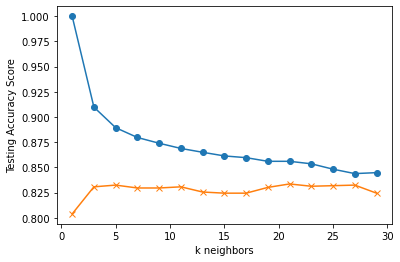

In [140]:
#Visualize
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [28]:
#Testing KNN model with sorted features
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores1 = []
test_scores1 = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled1, y_train1)
    train_score1 = knn.score(X_train_scaled1, y_train1)
    test_score1 = knn.score(X_test_scaled1, y_test1)
    train_scores1.append(train_score1)
    test_scores1.append(test_score1)
    print(f"k: {k}, Train/Test Score: {train_score1:.3f}/{test_score1:.3f}")
    

k: 1, Train/Test Score: 1.000/0.824
k: 3, Train/Test Score: 0.912/0.840
k: 5, Train/Test Score: 0.892/0.843
k: 7, Train/Test Score: 0.885/0.848
k: 9, Train/Test Score: 0.884/0.847
k: 11, Train/Test Score: 0.882/0.852
k: 13, Train/Test Score: 0.878/0.848
k: 15, Train/Test Score: 0.878/0.850
k: 17, Train/Test Score: 0.874/0.844
k: 19, Train/Test Score: 0.874/0.850
k: 21, Train/Test Score: 0.872/0.848
k: 23, Train/Test Score: 0.872/0.853
k: 25, Train/Test Score: 0.872/0.852
k: 27, Train/Test Score: 0.871/0.850
k: 29, Train/Test Score: 0.872/0.851


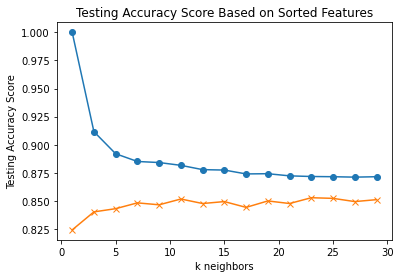

In [33]:
#Visualize based on sorted features
plt.plot(range(1, 30, 2), train_scores1, marker='o')
plt.plot(range(1, 30, 2), test_scores1, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.title("Testing Accuracy Score Based on Sorted Features")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [117]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [1, 2, 3],
              'n_estimators': [100, 200, 300]}
grid = GridSearchCV(model5, param_grid, verbose=3)

In [118]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................
[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................
[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................
[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.905, total=   1.1s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.907, total=   1.1s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.886, total=   1.3s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.889, total=   1.3s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.883, total=   1.2s
[CV] min_samples_split=2, n_estimators=200 ...........................
[

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.2min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [37]:
# Create the GridSearchCV model using sorted features
from sklearn.model_selection import GridSearchCV
param_grid1 = {'min_samples_split': [1, 2, 3],
              'n_estimators': [100, 200, 300]}
grid1 = GridSearchCV(sorted_model5, param_grid1, verbose=3)

In [38]:
# Train the model with GridSearch using sorted features
grid1.fit(X_train1, y_train1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=100 ...........................
[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

[CV] . min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................
[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=200 ...........................


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

[CV] . min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................
[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................
[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................
[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=1, n_estimators=300 ...........................
[CV] . min_samples_split=1, n_estimators=300, score=nan, total=   0.1s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.905, total=   0.4s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.897, total=   0.4s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.888, total=   0.5s
[CV] min_samples_split=2, n_estimators=100 ...........................
[CV]  min_samples_split=2, n_estimators=100, score=0.869, total=   0.4s
[CV] min_samples_split=2, n_estimators=100 ...........................
[C

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   28.1s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [119]:
print(grid.best_params_)
print(grid.best_score_)

{'min_samples_split': 2, 'n_estimators': 100}
0.8937601423383958


In [127]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)
print('Test Acc: %.3f' % grid.score(X_test, y_test))

Test Acc: 0.896


In [40]:
# Make predictions with the hypertuned model and sorted features
predictions1 = grid1.predict(X_test1)
print('Test Acc: %.3f' % grid1.score(X_test1, y_test1))

Test Acc: 0.893


In [128]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE","FALSE POSITIVE","CONFIRMED"]))

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.75      0.78       411
FALSE POSITIVE       0.83      0.85      0.84       484
     CONFIRMED       0.96      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.87      0.86      0.87      1748
  weighted avg       0.89      0.90      0.89      1748



In [41]:
# Calculate classification report with sorted features
from sklearn.metrics import classification_report
print(classification_report(y_test1, predictions1,
                            target_names=["CANDIDATE","FALSE POSITIVE","CONFIRMED"]))

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.73      0.77       411
FALSE POSITIVE       0.80      0.85      0.82       484
     CONFIRMED       0.98      1.00      0.99       853

      accuracy                           0.89      1748
     macro avg       0.87      0.86      0.86      1748
  weighted avg       0.89      0.89      0.89      1748



In [149]:
# We can weight the features by their importance for more tuning purpose
sorted_features=sorted(zip(model5.feature_importances_, X.columns), reverse=True)[:10]
sorted_features

[(0.1042627841623718, 'koi_fpflag_co'),
 (0.1005591447319951, 'koi_fpflag_nt'),
 (0.05999362312736498, 'koi_fpflag_ss'),
 (0.05809158514145868, 'koi_prad'),
 (0.05566752470422089, 'koi_model_snr'),
 (0.04020171602339959, 'koi_fpflag_ec'),
 (0.0395528606115416, 'koi_duration_err2'),
 (0.034302912424002574, 'koi_prad_err2'),
 (0.031703366812313005, 'koi_steff_err2'),
 (0.0312867265697172, 'koi_duration_err1')]

Text(0, 0.5, 'Importance Level')

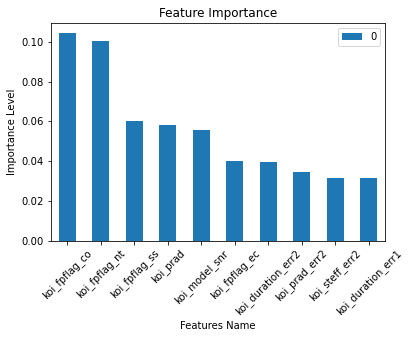

In [155]:
#Can be visualized in bar graph for analysis reason (feature weight)
ax=pd.DataFrame(sorted_features).plot.bar(x=1,y=0, rot=45, title="Feature Importance")
ax.set_xlabel("Features Name")
ax.set_ylabel("Importance Level")


## Rerunning Models by using top 10 features

In [157]:
#Setting new features based on sorted features
X1 = df[['koi_fpflag_co', 'koi_fpflag_nt','koi_fpflag_ss', 'koi_prad','koi_model_snr','koi_fpflag_ec', 'koi_duration_err2','koi_prad_err2','koi_steff_err2','koi_duration_err1' ]]

In [158]:
y1 = df["koi_disposition"]

# Save the Model

In [44]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'SVM.sav'
joblib.dump(sorted_model5, 'SVM.sav')

['SVM.sav']